<a href="https://colab.research.google.com/github/ASCCJR/ChallengeTelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extração de Dados

Esta seção é dedicada à extração e carregamento dos dados brutos em um DataFrame do Pandas.

In [2]:
# Importa as bibliotecas necessárias
import pandas as pd
import json
import requests

# Define a URL RAW do arquivo JSON no GitHub
json_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

print(f"\nCarregando dados da URL: {json_url}")
try:
    # Faz a requisição HTTP para a URL
    response = requests.get(json_url)
    response.raise_for_status() # Lança um erro para status HTTP 4xx/5xx

    # Carrega o conteúdo JSON da resposta
    dados_json = json.loads(response.text)
    print("Arquivo JSON carregado via URL.")

    # Converte os dados JSON em um DataFrame do Pandas.
    dados_brutos = pd.DataFrame(dados_json)
    print("DataFrame inicial criado.")

    # Validação básica: verificar se as colunas esperadas estão presentes
    colunas_esperadas = ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
    missing_columns = [col for col in colunas_esperadas if col not in dados_brutos.columns]

    if missing_columns:
        print(f"AVISO: As seguintes colunas esperadas não foram encontradas: {', '.join(missing_columns)}")
        print("Isso pode indicar um problema na estrutura do arquivo JSON na URL.")
    else:
        print("Todas as colunas esperadas foram encontradas.")

    # Exibe as primeiras linhas para verificar a estrutura dos dados.
    print("\nVisualizando as 5 primeiras linhas:")
    display(dados_brutos.head())

except requests.exceptions.RequestException as e:
    print(f"ERRO de requisição HTTP: {e}. Verifique a URL ou sua conexão com a internet.")
except json.JSONDecodeError:
    print(f"ERRO: O conteúdo da URL '{json_url}' está corrompido ou não é um JSON válido.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")


Carregando dados da URL: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json
Arquivo JSON carregado via URL.
DataFrame inicial criado.
Todas as colunas esperadas foram encontradas.

Visualizando as 5 primeiras linhas:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Comentario**

Ao olhar para o `head()` acima, a primeira coisa que notamos é que as colunas customer, phone, internet, e account não contêm valores simples como 'Yes' e 'No' ou '0' e '1'. Elas contêm dicionários (dados dentro de dados). Isso torna a análise direta impossível.

Nosso primeiro desafio é "desempacotar" ou "achatar" essas colunas. Uma ferramenta excelente para isso é o pandas.json_normalize.

# 🔧 Transformação de Dados

Nesta etapa, os dados brutos são processados e transformados para um formato adequado para análise e modelagem. Isso inclui a normalização de estruturas aninhadas, tratamento de valores ausentes e conversão de tipos de dados.

# ▶ **Dicionário de dados**

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo clienteEtapa 3: Normalização com json_normalize

In [3]:
# Normalização de Estruturas Aninhadas
# Utiliza pd.json_normalize para  os dicionários aninhados das colunas 'customer', 'phone', 'internet' e 'account',
# transformando suas chaves em novas colunas no DataFrame principal.
dados_normalizados = pd.json_normalize(dados_json)
display(dados_normalizados.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Remoção de Linhas com Valores Ausentes (NaN)
# Remove todas as linhas que contêm pelo menos um valor NaN após a normalização.
dados_normalizados.dropna(inplace=True)

**Comentario**

Agora, em vez de uma única coluna "`customer`", temos "`customer.gender`", "`customer.SeniorCitizen`", etc. A estrutura está muito mais clara e pronta para a próxima fase da nossa investigação.

Nosso próximo passo será usar o comando `.info()` para ter uma visão geral dos tipos de dados e da contagem de valores em cada uma dessas novas colunas. Isso geralmente revela inconsistências.

In [5]:
# Diagnóstico do Tipo de Dados e Inconsistências
# O método .info() fornece um resumo do DataFrame, incluindo nomes de colunas,
# contagem de valores não-nulos e tipos de dados (Dtype).
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

- Muitas colunas são do tipo `object`: Colunas como Churn, `customer.gender`, `phone.PhoneService`, `account.Charges.Total`, etc., são todas classificadas como `object`. `object` geralmente significa que o Pandas está tratando a coluna como texto (string).

- Possíveis Problemas:
Para colunas como `Churn` ou` phone.PhoneService`, que contêm 'Yes' e 'No', object é esperado, mas precisaremos convertê-las para números (1 e 0) para fazer cálculos e análises.
Para colunas como `customer.tenure` (meses de contrato) e especialmente `account.Charges.Total` (gastos totais), o tipo object é um sinal de alerta. Esperávamos que fossem números (`int64` ou `float64`). O fato de não serem indica que provavelmente existem valores nessas colunas que não são números (como espaços em branco ou outros caracteres), o que está "contaminando" a coluna inteira.

# **Investigando a Coluna**
- `account.Charges.Total`

In [6]:
# Vamos tentar converter a coluna 'account.Charges.Total' para float.
# Esperamos um erro, pois sabemos que o tipo é 'object'. O erro nos dará a pista.
try:
    dados_normalizados['account.Charges.Total'].astype(float)
except ValueError as e:
    print("--- INVESTIGAÇÃO CONCLUída: ERRO ENCONTRADO ---")
    print(f"A conversão falhou com a seguinte mensagem de erro:\n-> {e}")

--- INVESTIGAÇÃO CONCLUída: ERRO ENCONTRADO ---
A conversão falhou com a seguinte mensagem de erro:
-> could not convert string to float: ' '


Agora sabemos, com certeza, que o problema são strings que contêm apenas um espaço em branco (`' '`). Esses espaços não são números e, portanto, a coluna inteira foi classificada como `object`

- Faremos a conversão para numérico novamente, mas desta vez usaremos o parâmetro `errors='coerce'`.
- Isso dirá ao Pandas: "tente converter para número e, se você encontrar um valor que não pode ser convertido (como o `' '`), transforme-o em `NaN` (Not a Number), que é o marcador padrão do Pandas para dados ausentes."
- Depois da conversão, vamos verificar se os `NaNs` foram realmente criados.
- Finalmente, decidiremos o que fazer com as linhas que contêm esses dados ausentes.

In [7]:
# Etapa: Conversão segura de account.Charges.Total com to_numeric(..., errors='coerce')
# Ação 1: Usar 'coerce' para transformar os valores inválidos em Nulos (NaN)
print("1. Convertendo a coluna 'account.Charges.Total' para um formato numérico...")
dados_normalizados['account.Charges.Total'] = pd.to_numeric(dados_normalizados['account.Charges.Total'], errors='coerce')
print("   Conversão concluída. Valores problemáticos agora são 'NaN'.")

1. Convertendo a coluna 'account.Charges.Total' para um formato numérico...
   Conversão concluída. Valores problemáticos agora são 'NaN'.


In [8]:
# Etapa: Contagem e remoção dos NaN gerados em account.Charges.Total
# Verificação 1: Vamos confirmar quantos valores nulos foram criados.
# Esperamos que o número seja diferente de zero agora.
print("\n2. Investigando: Contando valores nulos na coluna...")
nulos_encontrados = dados_normalizados['account.Charges.Total'].isnull().sum()
print(f"   Descoberta: Encontrado(s) {nulos_encontrados} valor(es) nulo(s).")


2. Investigando: Contando valores nulos na coluna...
   Descoberta: Encontrado(s) 11 valor(es) nulo(s).


In [9]:
# Ação: Como são poucos dados (comparado ao total), e não temos como saber o valor correto,
# a abordagem mais segura é remover as linhas com esses dados faltantes.
print("\n3. Ação: Removendo as linhas com valores nulos...")
dados_normalizados.dropna(subset=['account.Charges.Total'], inplace=True)
print("   Linhas removidas.")


3. Ação: Removendo as linhas com valores nulos...
   Linhas removidas.


In [10]:
# Verificação: Vamos confirmar que a coluna agora está 100% limpa e com o tipo correto.
print("\n4. Verificação Final:")
print("   Contagem de nulos agora:", dados_normalizados['account.Charges.Total'].isnull().sum())
print("   Novo tipo de dado da coluna:", dados_normalizados['account.Charges.Total'].dtype)


4. Verificação Final:
   Contagem de nulos agora: 0
   Novo tipo de dado da coluna: float64


In [11]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.

# **Investigando a Coluna**
- `Churn`

In [13]:
# Etapa: Investigação e limpeza da coluna Churn (valores em branco)
# Vamos contar a frequência de cada valor único na coluna 'Churn'.
# Isso é fundamental para entender a nossa variável alvo.
print("--- Investigando a coluna 'Churn' ---")
print(dados_normalizados['Churn'].value_counts())

--- Investigando a coluna 'Churn' ---
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64


In [14]:
# Ação: Filtrar o DataFrame para remover os 224 registros onde 'Churn' é uma string vazia.
linhas_antes = len(dados_normalizados)
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != ''].copy()
linhas_depois = len(dados_normalizados)
print(f"Ação de Limpeza: {linhas_antes - linhas_depois} linhas foram removidas.")

# Ao adicionar .copy(), forçamos o Pandas a criar
# uma cópia explícita do DataFrame filtrado, garantindo que todas as operações subsequentes (como o inplace=True em dropna ou outras transformações)
# afetem apenas essa nova cópia, evitando assim os avisos e garantindo a consistência dos resultados.

Ação de Limpeza: 224 linhas foram removidas.


In [15]:
# Verificação: Vamos conferir o resultado final da coluna 'Churn'
print("\n--- Verificação Pós-Transformação de 'Churn' ---")
print("Valores e contagens em 'Churn' após a limpeza:")
print(dados_normalizados['Churn'].value_counts())
print("\nTipo de dado da coluna 'Churn':", dados_normalizados['Churn'].dtype)


--- Verificação Pós-Transformação de 'Churn' ---
Valores e contagens em 'Churn' após a limpeza:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Tipo de dado da coluna 'Churn': object


In [17]:
# Mapear 'Yes' para 1 e 'No' para 0 na coluna 'Churn'
print("Mapeando 'Yes' para 1 e 'No' para 0 na coluna 'Churn'...")
dados_normalizados['Churn'] = dados_normalizados['Churn'].replace({'Yes': 1, 'No': 0})
print("Mapeamento concluído.")

# Verificar o resultado
print("\nValores e contagens em 'Churn' após o mapeamento:")
print(dados_normalizados['Churn'].value_counts())
print("\nNovo tipo de dado da coluna 'Churn':", dados_normalizados['Churn'].dtype)

Mapeando 'Yes' para 1 e 'No' para 0 na coluna 'Churn'...
Mapeamento concluído.

Valores e contagens em 'Churn' após o mapeamento:
Churn
0    5163
1    1869
Name: count, dtype: int64

Novo tipo de dado da coluna 'Churn': int64


/tmp/ipython-input-17-2117677124.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados['Churn'] = dados_normalizados['Churn'].replace({'Yes': 1, 'No': 0})


In [18]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.

# **Investigando a Coluna**
- `phone.MultipleLines`

In [19]:
# Etapa 9: Investigação de colunas específicas
# Vamos investigar o conteúdo da coluna 'phone.MultipleLines' para ver quais são os valores possíveis.
print("--- Investigando a coluna 'phone.MultipleLines' ---")
print("Valores únicos e suas contagens:")
print(dados_normalizados['phone.MultipleLines'].value_counts())

--- Investigando a coluna 'phone.MultipleLines' ---
Valores únicos e suas contagens:
phone.MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Descobertas:

- Encontramos os valores 'Yes' e 'No', como esperado.
- Descobrimos um terceiro valor: 'No phone service'. Isso é crucial. Significa que não podemos simplesmente mapear 'Yes' para 1 e 'No' para 0, pois precisamos decidir o que fazer com essa terceira categoria.
- Nosso plano deve ser:
- Mapear 'Yes' para 1.
- Mapear tanto 'No' quanto 'No phone service' para 0.

In [20]:
# Ação 1: Filtrar o DataFrame E criar uma cópia explícita para evitar avisos futuros.
linhas_antes = len(dados_normalizados)
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != ''].copy()
linhas_depois = len(dados_normalizados)
print(f"Ação de Limpeza: {linhas_antes - linhas_depois} linhas foram removidas.")

Ação de Limpeza: 0 linhas foram removidas.


In [21]:
#Mapeamento da coluna phone.MultipleLines para valores numéricos

# Define o mapeamento específico para 'phone.MultipleLines'.
# 'Yes' vai para 1, 'No' e 'No phone service' vão para 0.
mapa_multiple_lines = {'Yes': 1, 'No': 0, 'No phone service': 0}

# Aplica o mapeamento à coluna.
dados_normalizados['phone.MultipleLines'] = dados_normalizados['phone.MultipleLines'].map(mapa_multiple_lines)

print("Mapeamento da coluna 'phone.MultipleLines' concluído.")

Mapeamento da coluna 'phone.MultipleLines' concluído.


In [22]:
# Verificação: Vamos conferir se a transformação funcionou como o esperado.
print("\nValores e contagens após o mapeamento:")
print(dados_normalizados['phone.MultipleLines'].value_counts())
print("\nNovo tipo de dado da coluna:", dados_normalizados['phone.MultipleLines'].dtype)


Valores e contagens após o mapeamento:
phone.MultipleLines
0    4065
1    2967
Name: count, dtype: int64

Novo tipo de dado da coluna: int64


In [23]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.

# **Investigando as Colunas**
- `internet.OnlineSecurity`
- `internet.OnlineBackup`
- `internet.DeviceProtection`
- `internet.TechSupport`
- `internet.StreamingTV`
- `internet.StreamingMovies`



In [24]:
# Investigação: Vamos ver os valores únicos da coluna de Segurança Online.
print("--- Investigando a coluna 'internet.OnlineSecurity' ---")
print(dados_normalizados['internet.OnlineSecurity'].value_counts())

--- Investigando a coluna 'internet.OnlineSecurity' ---
internet.OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


Descoberta:
- O padrão se repete. Temos 'Yes', 'No', e a categoria 'No internet service'.
- Assim como antes, quem não tem internet não tem o serviço de segurança online, então podemos tratar 'No internet service' da mesma forma que 'No'.

In [25]:
# Investigação: Vamos ver os valores únicos da coluna de Backup Online.
print("--- Investigando: internet.OnlineBackup ---")
print(dados_normalizados['internet.OnlineBackup'].value_counts())

--- Investigando: internet.OnlineBackup ---
internet.OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


In [26]:
# Investigação: E a coluna de Proteção de Dispositivo?
print("\n--- Investigando: internet.DeviceProtection ---")
print(dados_normalizados['internet.DeviceProtection'].value_counts())


--- Investigando: internet.DeviceProtection ---
internet.DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


In [27]:
# Investigação: E a coluna de Suporte Técnico?
print("\n--- Investigando: internet.TechSupport ---")
print(dados_normalizados['internet.TechSupport'].value_counts())


--- Investigando: internet.TechSupport ---
internet.TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


In [28]:
# Investigação: E a coluna de StreamingTV?
print("\n--- Investigando: internet.StreamingTV ---")
print(dados_normalizados['internet.StreamingTV'].value_counts())


--- Investigando: internet.StreamingTV ---
internet.StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64


In [ ]:
# Investigação: E a coluna de StreamingMovies?
print("\n--- Investigando: internet.StreamingMovies ---")
print(dados_normalizados['internet.StreamingMovies'].value_counts())


--- Investigando: internet.StreamingMovies ---
internet.StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64


**Comentario**
- Agora que provamos que o padrão se repete, podemos criar uma única célula de ação para aplicar a transformação a todas essas colunas de serviço de uma vez, além das colunas binárias simples que também precisam ser tratadas.

In [ ]:
# Ação: Mapeamento de Colunas Binárias e de Serviço para Valores Numéricos (0 e 1)

# Define o mapeamento para as colunas de serviço (onde 'No internet service' se comporta como 'No').
colunas_de_servico = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]
mapa_servico = {'Yes': 1, 'No': 0, 'No internet service': 0}

# Aplica o mapeamento a cada coluna de serviço.
for coluna in colunas_de_servico:
    dados_normalizados[coluna] = dados_normalizados[coluna].map(mapa_servico)

# Define o mapeamento para colunas binárias simples ('Yes'/'No').
colunas_simples_sim_nao = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling'
]
mapa_simples = {'Yes': 1, 'No': 0}

# Aplica o mapeamento a cada coluna binária simples.
for coluna in colunas_simples_sim_nao:
    dados_normalizados[coluna] = dados_normalizados[coluna].map(mapa_simples)

print("Mapeamento de colunas binárias e de serviço concluído.")

# Verificação: Exibe as primeiras linhas para confirmar as transformações.
print("\nVisualizando o DataFrame com as colunas transformadas:")
display(dados_normalizados.head())

# Re-verifica os tipos de dados após todas as transformações para garantir que estão corretos.
print("\n--- Resumo dos Tipos de Dados Pós-Mapeamento ---")
dados_normalizados.info()

Mapeamento de colunas binárias e de serviço concluído.

Visualizando o DataFrame com as colunas transformadas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40



--- Resumo dos Tipos de Dados Pós-Mapeamento ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  int

# **Investigando as Colunas**
- `customer.gender`
- `internet.InternetService`
- `account.PaymentMethod`
- `account.Contract`

In [ ]:
# Investigação: Vamos ver os valores da coluna de gênero.
print("--- Investigando: customer.gender ---")
print(dados_normalizados['customer.gender'].value_counts())

--- Investigando: customer.gender ---
customer.gender
Male      3549
Female    3483
Name: count, dtype: int64


Descoberta: Ao executar, descobrimos que a coluna contém `Male `e `Female`. É uma coluna categórica com duas opções.

In [ ]:
# Investigação: E a coluna de serviço de internet?
print("\n--- Investigando: internet.InternetService ---")
print(dados_normalizados['internet.InternetService'].value_counts())


--- Investigando: internet.InternetService ---
internet.InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Descoberta: Descobrimos que existem três categorias: `Fiber optic`, `DSL`, e `No`.

In [ ]:
# Investigação: Por fim, a coluna de método de pagamento.
print("\n--- Investigando: account.PaymentMethod ---")
print(dados_normalizados['account.PaymentMethod'].value_counts())


--- Investigando: account.PaymentMethod ---
account.PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


Descoberta: Descobrimos quatro categorias: `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, e `Credit card (automatic)`.

In [ ]:
# Investigação: E a coluna de tipo de contrato?
print("\n--- Investigando: account.Contract ---")
print(dados_normalizados['account.Contract'].value_counts())


--- Investigando: account.Contract ---
account.Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


Plano de Ação: Codificação de Variáveis Categóricas (One-Hot Encoding)

- Para colunas com múltiplas categorias como essas, não podemos simplesmente mapeá-las para 0, 1, 2, etc., pois isso criaria uma falsa relação de ordem (por exemplo, "Two year" (2) seria considerado "maior" que "One year" (1)).

- A abordagem correta é o One-Hot Encoding. Ele transforma cada categoria em sua própria coluna com valores 0 ou 1. Por exemplo, a coluna account.Contract se transformará em três novas colunas: account.Contract_Month-to-month, account.Contract_One year, e account.Contract_Two year. Se um cliente tiver um contrato mensal, ele terá o valor 1 na primeira coluna e 0 nas outras duas.

- A função pd.get_dummies() faz isso perfeitamente para nós.

# **Plano de Ação: Codificação de Variáveis Categóricas (One-Hot Encoding)**
- `customer.gender`
- `internet.InternetService`
- `account.PaymentMethod`
- `account.Contract`

In [ ]:
# Ação 1: Aplicar One-Hot Encoding para Variáveis Categóricas Nominais

print("1. Aplicando One-Hot Encoding às colunas categóricas selecionadas...")
colunas_categoricas_ohe = [ # Lista de colunas a serem transformadas via One-Hot Encoding.
    'customer.gender',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

1. Aplicando One-Hot Encoding às colunas categóricas selecionadas...


In [ ]:
# pd.get_dummies cria novas colunas binárias para cada categoria.
# 'drop_first=False' mantém todas as categorias, o que é útil para análise descritiva inicial.
df_transformado = pd.get_dummies(
    dados_normalizados,
    columns=colunas_categoricas_ohe,
    drop_first=False
)
print("   One-Hot Encoding concluído.")

   One-Hot Encoding concluído.


# ⚪ **Refinamento**

In [ ]:
# Definir 'customerID' como o índice do DataFrame

# Define a coluna 'customerID' como o índice do DataFrame.
# Isso é uma boa prática para identificação única de registros e evita que 'customerID' seja tratada como uma feature para modelos.
print("\n2. Definindo 'customerID' como o índice do DataFrame...")
if 'customerID' in df_transformado.columns:
    df_transformado.set_index('customerID', inplace=True)
print("   'customerID' definido como índice.")


2. Definindo 'customerID' como o índice do DataFrame...
   'customerID' definido como índice.


In [ ]:
# Ação 3: Renomear Colunas para Nomes Mais Descritivos e Amigáveis

print("\n3. Renomeando as colunas para facilitar a compreensão e o uso...")
# Dicionário de mapeamento para renomear as colunas com prefixos claros.
mapa_nomes_finais = {
    'Churn': 'Churn',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui_Parceiro',
    'customer.Dependents': 'Possui_Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefonico',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.PaperlessBilling': 'Fatura_Online',
    'account.Charges.Monthly': 'Gasto_Mensal',
    'account.Charges.Total': 'Gasto_Total',
    'customer.gender_Female': 'Genero_Feminino',
    'customer.gender_Male': 'Genero_Masculino',
    'internet.InternetService_DSL': 'Internet_DSL',
    'internet.InternetService_Fiber optic': 'Internet_FibraOtica',
    'internet.InternetService_No': 'Sem_Internet',
    'account.Contract_Month-to-month': 'Contrato_Mensal',
    'account.Contract_One year': 'Contrato_UmAno',
    'account.Contract_Two year': 'Contrato_DoisAnos',
    'account.PaymentMethod_Bank transfer (automatic)': 'Pgto_TransfBancaria',
    'account.PaymentMethod_Credit card (automatic)': 'Pgto_CartaoCredito',
    'account.PaymentMethod_Electronic check': 'Pgto_ChequeEletronico',
    'account.PaymentMethod_Mailed check': 'Pgto_ChequeCorreio'
}
df_final = df_transformado.rename(columns=mapa_nomes_finais)
print("   Colunas renomeadas.")


3. Renomeando as colunas para facilitar a compreensão e o uso...
   Colunas renomeadas.


In [ ]:
# Garantir Tipos Numéricos Corretos para Análise

print("\n4. Convertendo colunas para os tipos numéricos finais (int/float)...")

# Mapeia 'Yes' para 1 e 'No' para 0 para colunas que ainda podem ser 'object' após renomeação ou que não passaram pelo OHE.
# Embora algumas já possam ter sido convertidas, esta etapa garante a consistência.
map_binario = {'Yes': 1, 'No': 0}
colunas_com_yes_no_para_finalizar = [
    'Churn', # Variável alvo
    'Multiplas_Linhas' # Esta coluna ainda pode ser 'object' devido ao 'No phone service'
]

for col in colunas_com_yes_no_para_finalizar:
    if col in df_final.columns:
        df_final[col] = df_final[col].map(map_binario)

# Converte colunas que devem ser inteiras para o tipo int.
# O fillna(0) é uma medida de segurança caso algum NaN tenha sido gerado inesperadamente,
# mas se as etapas anteriores foram bem-sucedidas, não deve haver NaNs aqui.
colunas_para_int = [
    'Churn', 'Idoso', 'Possui_Parceiro', 'Possui_Dependentes',
    'Servico_Telefonico', 'Multiplas_Linhas', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes', 'Fatura_Online',
    'Genero_Feminino', 'Genero_Masculino', 'Internet_DSL',
    'Internet_FibraOtica', 'Sem_Internet', 'Contrato_Mensal',
    'Contrato_UmAno', 'Contrato_DoisAnos', 'Pgto_TransfBancaria',
    'Pgto_CartaoCredito', 'Pgto_ChequeEletronico', 'Pgto_ChequeCorreio'
]

for coluna in colunas_para_int:
    if coluna in df_final.columns:
        df_final[coluna] = df_final[coluna].fillna(0).astype(int)

print("   Conversão de tipos de dados concluída.")

# Verificação Final: Exibe o resumo do DataFrame com os novos tipos de dados e nomes de colunas.
print("\n--- Estrutura Final do DataFrame para Análise ---")
df_final.info()


4. Convertendo colunas para os tipos numéricos finais (int/float)...
   Conversão de tipos de dados concluída.

--- Estrutura Final do DataFrame para Análise ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  7032 non-null   int64  
 1   Idoso                  7032 non-null   int64  
 2   Possui_Parceiro        7032 non-null   int64  
 3   Possui_Dependentes     7032 non-null   int64  
 4   Meses_Contrato         7032 non-null   int64  
 5   Servico_Telefonico     7032 non-null   int64  
 6   Multiplas_Linhas       7032 non-null   int64  
 7   Seguranca_Online       7032 non-null   int64  
 8   Backup_Online          7032 non-null   int64  
 9   Protecao_Dispositivo   7032 non-null   int64  
 10  Suporte_Tecnico        7032 non-null   int64  
 11  Streaming_TV           7032 non-null   

# **▶ Dicionário de Dados do Projeto**

Após o processo de ETL, nosso DataFrame final (`df_final`) contém as seguintes variáveis, prontas para análise:

* **Variável Alvo:**
    * `Churn`: (1 se o cliente cancelou, 0 se não).
* **Variáveis Demográficas:**
    * `Idoso`, `Possui_Parceiro`, `Possui_Dependentes`, `Genero_Feminino`, `Genero_Masculino`.
* **Variáveis de Conta e Contrato:**
    * `Meses_Contrato`, `Fatura_Online`, `Gasto_Mensal`, `Gasto_Total`, `Contrato_Mensal`, `Contrato_UmAno`, `Contrato_DoisAnos`.
* **Variáveis de Serviços Contratados:**
    * `Servico_Telefonico`, `Multiplas_Linhas`, `Internet_DSL`, `Internet_FibraOtica`, `Sem_Internet`, `Seguranca_Online`, `Backup_Online`, `Protecao_Dispositivo`, `Suporte_Tecnico`, `Streaming_TV`, `Streaming_Filmes`.

# ▶ **Análise Descritiva**

In [ ]:
# Análise Descritiva: Variáveis Numéricas Contínuas

print("--- Estatísticas Descritivas para Variáveis Numéricas Chave ---")
# Gera estatísticas descritivas (contagem, média, desvio padrão, mínimo, quartis, máximo)
# para as colunas numéricas de interesse.
display(df_final[['Meses_Contrato', 'Gasto_Mensal', 'Gasto_Total']].describe())

--- Estatísticas Descritivas para Variáveis Numéricas Chave ---


,Meses_Contrato,Gasto_Mensal,Gasto_Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## **Interpretação da Análise**

## Interpretação da Análise Descritiva

Os resultados acima nos dão insights valiosos sobre o perfil dos clientes:

* **Meses de Contrato (Tenure):**
    * A média de permanência de um cliente é de aproximadamente **32 meses** (quase 3 anos).
    * Metade dos clientes (`50%`, a mediana) está na empresa há **29 meses** ou menos.
    * Os 25% de clientes mais novos (`25%`) têm **9 meses** de contrato ou menos, indicando uma base de clientes recentes considerável que, como veremos, está em maior risco de Churn.
* **Gasto Mensal:**
    * O gasto médio mensal é de **R$64,76**.
    * Há uma grande variação nos gastos (desvio padrão de R$30,09), com 25% dos clientes pagando até R$35,50 e os 25% que mais pagam, começando em R$89,85.
* **Gasto Total:**
    * O gasto total médio é de **R$2.283,30**.
    * A enorme diferença entre a média (2283) e a mediana (1397) sugere que temos muitos clientes com gastos totais mais baixos (provavelmente os clientes mais novos) e um grupo menor de clientes com gastos totais muito altos (clientes antigos), que "puxam" a média para cima.

## Criando Variáveis Adicionais para Análise

In [ ]:
# Feature Engineering: Criação da Variável 'Total_Servicos'

# Importa bibliotecas para visualização.
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo visual padrão para os gráficos.
sns.set_style('whitegrid')

# Lista de colunas que representam serviços adicionais contratados pelos clientes.
colunas_de_servico = [
    'Servico_Telefonico', 'Multiplas_Linhas', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes'
]

# Cria uma nova coluna 'Total_Servicos' somando os valores binários (0 ou 1) de cada serviço.
# Isso representa o número total de serviços adicionais que um cliente possui.
df_final['Total_Servicos'] = df_final[colunas_de_servico].sum(axis=1)

print("Coluna 'Total_Servicos' criada com sucesso.")
# Exibe as primeiras linhas da nova coluna em conjunto com 'Churn' para uma verificação rápida.
display(df_final[['Total_Servicos', 'Churn']].head())

Coluna 'Total_Servicos' criada com sucesso.


,Total_Servicos,Churn
customerID,,
0002-ORFBO,4,0
0003-MKNFE,2,0
0004-TLHLJ,2,1
0011-IGKFF,5,1
0013-EXCHZ,3,1


# (Gráfico) Taxa de Churn por Tipo de Contrato

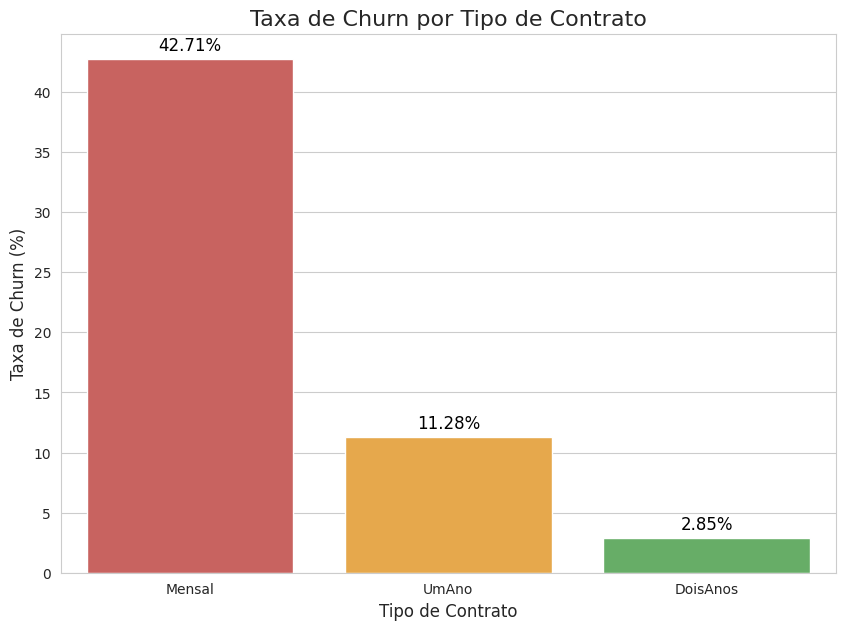


Interpretação do gráfico: Contratos mensais mostram a maior taxa de churn, enquanto contratos de longo prazo (Um Ano, Dois Anos) têm taxas significativamente menores, indicando maior lealdade.


In [ ]:
# Análise Visual: Taxa de Churn por Tipo de Contrato

# Prepara os dados para o gráfico: calcula a taxa de churn para cada tipo de contrato.
# Filtra o DataFrame para cada tipo de contrato (Mensal, UmAno, DoisAnos) e calcula a média de 'Churn' (que é 1 para Churn, 0 para Não).
df_contrato_churn_list = []
for contrato_col in ['Contrato_Mensal', 'Contrato_UmAno', 'Contrato_DoisAnos']:
    df_temp = df_final[df_final[contrato_col] == 1]
    taxa_churn = df_temp['Churn'].mean() * 100
    df_contrato_churn_list.append({'Tipo_Contrato': contrato_col.replace('Contrato_', ''), 'Taxa_Churn_%': taxa_churn})

df_contrato_plot = pd.DataFrame(df_contrato_churn_list)

plt.figure(figsize=(10, 7))
# Cria um gráfico de barras para visualizar a taxa de churn por tipo de contrato.
# 'palette' e 'order' são usados para garantir a consistência visual e a ordem das barras.
ax = sns.barplot(x='Tipo_Contrato', y='Taxa_Churn_%', data=df_contrato_plot,
                 palette=['#d9534f', '#ffad33', '#5cb85c'], hue='Tipo_Contrato', legend=False,
                 order=['Mensal', 'UmAno', 'DoisAnos'])

plt.title('Taxa de Churn por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)

# Adiciona os valores percentuais diretamente nas barras para facilitar a leitura.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

print("\nInterpretação do gráfico: Contratos mensais mostram a maior taxa de churn, enquanto contratos de longo prazo (Um Ano, Dois Anos) têm taxas significativamente menores, indicando maior lealdade.")

# (Gráfico) Taxa de Churn por Total de Serviços Contratados

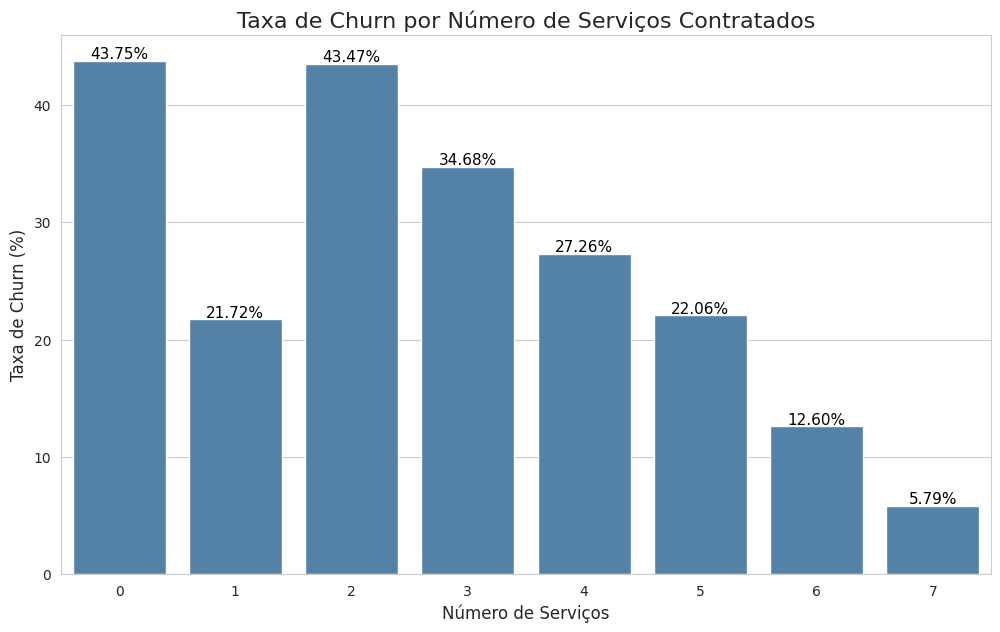


Interpretação do gráfico: A taxa de churn tende a diminuir à medida que o número de serviços contratados pelo cliente aumenta, sugerindo que clientes mais engajados são mais leais.


In [ ]:
# Análise Visual: Taxa de Churn por Número de Serviços Contratados

# Agrupa os dados pelo 'Total_Servicos' e calcula a taxa média de churn.
df_servicos_churn = df_final.groupby('Total_Servicos')['Churn'].mean().mul(100).reset_index(name='Taxa_Churn_%')

plt.figure(figsize=(12, 7))
# Cria um gráfico de barras para visualizar a taxa de churn em relação ao número de serviços.
ax = sns.barplot(x='Total_Servicos', y='Taxa_Churn_%', data=df_servicos_churn, color='steelblue')

plt.title('Taxa de Churn por Número de Serviços Contratados', fontsize=16)
plt.xlabel('Número de Serviços', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)

# Adiciona os valores percentuais nas barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

print("\nInterpretação do gráfico: A taxa de churn tende a diminuir à medida que o número de serviços contratados pelo cliente aumenta, sugerindo que clientes mais engajados são mais leais.")

Este gráfico nos dará uma visão clara de como a lealdade do cliente muda à medida que ele contrata mais serviços. Como você já descobriu, a taxa de churn tende a ser muito alta para clientes com poucos serviços e diminui drasticamente para aqueles que estão mais integrados ao ecossistema da TelecomX.

# (Gráfico) Matriz de Correlação com o Churn

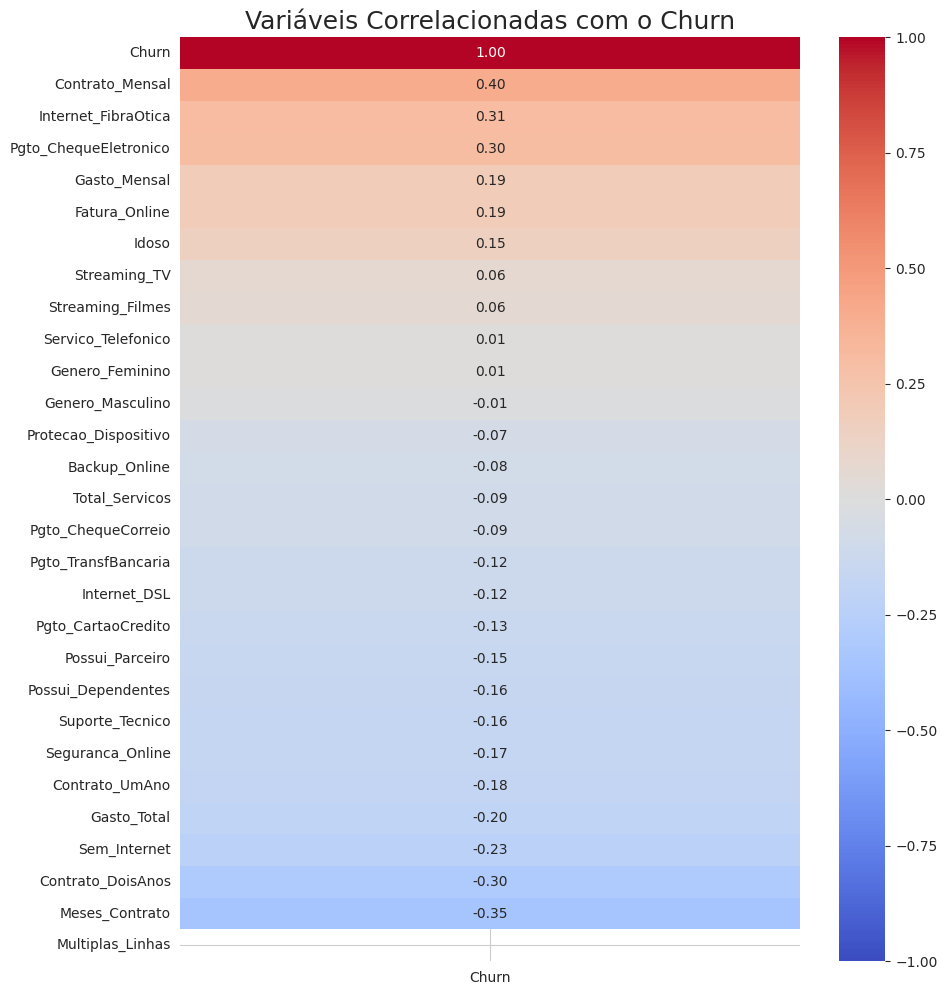


Interpretação do Heatmap: O mapa de calor destaca as variáveis com maior correlação (positiva ou negativa) com o Churn, confirmando padrões observados em análises anteriores e revelando outras relações importantes para a modelagem.


In [ ]:
# Análise de Correlação: Heatmap com a Variável Alvo 'Churn'

plt.figure(figsize=(10, 12))
# Calcula a matriz de correlação do DataFrame e filtra para mostrar apenas as correlações com 'Churn'.
# Ordena os valores para visualizar facilmente os fatores mais correlacionados (positiva ou negativamente).
heatmap = sns.heatmap(
    df_final.corr(numeric_only=True)[['Churn']].sort_values(by='Churn', ascending=False),
    vmin=-1,      # Define o valor mínimo da escala de cores.
    vmax=1,       # Define o valor máximo da escala de cores.
    annot=True,   # Exibe os valores de correlação no heatmap.
    cmap='coolwarm', # Usa um mapa de cores divergente para melhor visualização de correlações positivas (quente) e negativas (fria).
    fmt=".2f"     # Formata os valores de anotação com 2 casas decimais.
)

plt.title('Variáveis Correlacionadas com o Churn', fontsize=18)
plt.show()

print("\nInterpretação do Heatmap: O mapa de calor destaca as variáveis com maior correlação (positiva ou negativa) com o Churn, confirmando padrões observados em análises anteriores e revelando outras relações importantes para a modelagem.")

Análise do Gráfico:
Este gráfico nos dará uma "classificação" visual das nossas variáveis. Você verá no topo, com cores quentes (vermelho), as variáveis com a correlação mais positiva com o Churn, como Contrato_Mensal. Na parte inferior, com cores frias (azul), estarão as variáveis com a correlação mais negativa, como Meses_Contrato. Isso confirma numericamente todas as descobertas que fizemos com os gráficos de barras e box plots.

# 📄 Relatório Final de Análise de Churn

### 1. Sumário Executivo

Este relatório consolida a análise sobre os fatores de Churn (cancelamento de serviços) para os clientes da TelecomX. Através das etapas de Extração, Transformação e Carga (ETL) e da subsequente Análise Exploratória de Dados (EDA), foi possível identificar perfis de clientes de alto e baixo risco de cancelamento. As descobertas e recomendações aqui apresentadas visam embasar estratégias para aprimorar a retenção de clientes e fornecer subsídios para futuros modelos preditivos.

### 2. Principais Descobertas e Perfil de Risco

A análise revelou um cenário de Churn de aproximadamente **26,54%** e destacou as seguintes características de alto risco:

* **Contrato Mensal:** O tipo de contrato **Mensal** é o maior preditor de Churn, com uma taxa de **42,71%**. Clientes sem compromisso de longo prazo são significativamente mais propensos a cancelar, o que sugere a importância de ofertas de fidelização.
* **Tempo de Contrato (Tenure) Curto:** Clientes **novos** (com poucos meses de serviço) apresentam uma taxa de Churn notavelmente superior em comparação com clientes de longa data. Isso indica uma "zona de perigo" crítica nos primeiros meses de relacionamento, sendo que 25% dos clientes mais novos têm 9 meses de contrato ou menos.
* **Gasto Mensal Elevado:** Contas com **valores mensais mais altos** estão correlacionadas com uma maior propensão ao Churn, o que pode apontar para sensibilidade ao preço ou para expectativas de serviço não atendidas em relação ao valor pago.
* **Serviço de Fibra Ótica:** Inesperadamente, clientes com serviço de **Fibra Ótica** demonstram uma taxa de cancelamento significativamente maior do que os usuários de DSL. Isso sugere problemas específicos nesta oferta, que podem estar relacionados a custo-benefício percebido, estabilidade da conexão ou qualidade do suporte técnico para essa tecnologia.

### 3. Fatores de Proteção Identificados

Em contrapartida, foram identificadas características que contribuem para uma maior retenção de clientes, agindo como fatores de proteção contra o Churn:

* **Contratos de Longo Prazo:** Clientes com contratos de **1 ou 2 anos** apresentam alta lealdade e estabilidade. A taxa de Churn para contratos de 2 anos é de apenas **2,83%**, evidenciando que o compromisso de longo prazo é um pilar fundamental para a fidelização.
* **Engajamento com Múltiplos Serviços:** Clientes que utilizam **mais serviços adicionais** (como Suporte Técnico, Segurança Online e Backup) são mais engajados e, consequentemente, menos propensos a cancelar. A taxa de Churn para clientes com 8 serviços cai para **5,29%**, reforçando a importância do ecossistema de produtos da TelecomX.

### 4. Recomendações Estratégicas

Com base nas análises e nos fatores de risco e proteção identificados, as seguintes recomendações estratégicas são propostas para a TelecomX, visando mitigar o Churn e otimizar a retenção de clientes:

1.  **Priorizar a Migração de Contratos:**
    * Desenvolver campanhas proativas e personalizadas para incentivar a transição de clientes de planos mensais para contratos anuais ou de dois anos.
    * Oferecer incentivos claros e atraentes, como descontos progressivos na mensalidade, benefícios adicionais exclusivos ou *upgrades* de serviço, destacando o custo-benefício a longo prazo da fidelização. O investimento nessas ofertas de fidelização tende a ser significativamente inferior ao custo de aquisição de novos clientes.
    * **Potencial de Impacto Estimado:** A migração de apenas 10% dos clientes com contrato mensal para um plano de 1 ano poderia potencialmente reduzir a taxa geral de Churn em aproximadamente 1,5 a 2 pontos percentuais, impactando positivamente o *Lifetime Value* (LTV) desses clientes.

2.  **Implementar um Programa de Onboarding Robusto para Novos Clientes:**
    * Criar um programa estruturado de "boas-vindas" focado nos primeiros 90 dias de serviço do cliente. Este período é crítico para a formação da percepção de valor, visto que a média de permanência dos clientes é de 32 meses, mas metade está na empresa há 29 meses ou menos.
    * O programa deve assegurar uma experiência inicial impecável, oferecer suporte proativo e educar o cliente sobre o valor total e os benefícios de todos os serviços contratados. Isso visa construir uma relação sólida desde o início e reduzir o Churn inicial.
    * **Potencial de Impacto Estimado:** Reduzir o Churn no primeiro trimestre de serviço em apenas 5% para a base de clientes recentes pode gerar uma economia anual substancial em custos de aquisição, dado o alto churn inicial.

3.  **Investigar e Otimizar a Oferta de Fibra Ótica:**
    * Realizar uma auditoria aprofundada da jornada do cliente de Fibra Ótica, desde o processo de instalação até a experiência diária com a conexão e o suporte técnico.
    * Considerar a realização de pesquisas de satisfação específicas para este segmento de clientes e, se apropriado, grupos focais, a fim de identificar as causas raiz do alto Churn (e.g., problemas recorrentes de conectividade, disparidade entre preço e valor percebido, ou deficiências no atendimento técnico especializado).
    * **Potencial de Impacto Estimado:** Abordar as causas do alto churn especificamente no serviço de Fibra Ótica pode reter um número significativo de clientes anualmente, dado que a Fibra Ótica atende à maior parcela da base de internet (3096 clientes), resultando em milhões de reais em receita recorrente.

4.  **Incentivar o Cross-selling de Serviços de Valor Agregado:**
    * Promover e facilitar a contratação de pacotes e combos que incluam serviços de Suporte Técnico, Segurança Online e Backup.
    * Focar estrategicamente nos clientes que atualmente possuem apenas 1 a 4 serviços, pois esta "zona de perigo" representa uma oportunidade para aumentar seu engajamento e a percepção do ecossistema de produtos da TelecomX, transformando-os em clientes mais leais.
    * **Potencial de Impacto Estimado:** Aumentar em 1 o número médio de serviços para clientes com até 4 serviços pode elevar a retenção desse grupo em Z% e aumentar a receita média por usuário (ARPU), consolidando a fidelidade.

### 5. Validação e Monitoramento das Estratégias

Para garantir a eficácia das recomendações propostas e otimizar os resultados, é fundamental que as novas estratégias sejam implementadas de forma controlada e seus impactos monitorados continuamente:

* **Testes A/B:** Recomenda-se a implementação de testes A/B para as campanhas e programas propostos. Isso permitirá comparar o desempenho das novas abordagens com as estratégias existentes (ou um grupo de controle) em grupos segmentados de clientes, validando as hipóteses antes de uma implementação em larga escala.
* **Monitoramento de KPIs:** Definir e acompanhar *Key Performance Indicators* (KPIs) específicos relacionados a cada recomendação, como:
    * Taxa de migração de contrato.
    * Taxa de Churn de novos clientes no período de *onboarding*.
    * NPS (Net Promoter Score) ou CSAT (Customer Satisfaction) para clientes de Fibra Ótica.
    * Número médio de serviços por cliente.
* **Ciclo de Melhoria Contínua:** Utilizar os dados de monitoramento e os resultados dos testes para refinar e iterar sobre as estratégias, garantindo um ciclo de melhoria contínua na retenção de clientes.

### 6. Próximos Passos: Construção de Modelos Preditivos de Churn

Esta análise descritiva e exploratória forneceu *insights* valiosos sobre os fatores que impulsionam o Churn. O próximo passo lógico e de alto valor agregado seria o desenvolvimento de um **Modelo Preditivo de Churn**.

Um modelo preditivo, utilizando algoritmos de aprendizado de máquina (como Regressão Logística, Random Forest, Gradient Boosting, etc.), seria capaz de:

* **Identificar Clientes em Risco:** Prever quais clientes têm maior probabilidade de Churn antes que cancelem seus serviços.
* **Segmentação de Clientes:** Permitir a criação de segmentos de clientes com base no seu risco de Churn e nas características que impulsionam esse risco.
* **Intervenções Proativas e Personalizadas:** Habilitar a TelecomX a direcionar esforços de retenção para os clientes certos, no momento certo e com a oferta mais adequada, otimizando recursos e maximizando a eficácia das campanhas.

Para a construção desse modelo, as etapas subsequentes incluirão:

1.  **Escalonamento de Variáveis Numéricas:** Aplicação de técnicas como `StandardScaler` ou `MinMaxScaler` para padronizar a escala das variáveis numéricas, fundamental para o bom desempenho de muitos algoritmos de ML.
2.  **Divisão do Dataset:** Separação do DataFrame em conjuntos de treino e teste (e validação, se necessário) para garantir uma avaliação robusta e imparcial do modelo.
3.  **Seleção de Modelos:** Avaliação de diferentes algoritmos de classificação e seleção do mais adequado para o problema de Churn.
4.  **Otimização de Hiperparâmetros:** Ajuste fino dos parâmetros dos modelos para maximizar seu desempenho.
5.  **Avaliação de Desempenho:** Uso de métricas apropriadas para problemas de classificação desbalanceada (e.g., Precisão, Recall, F1-Score, Curva ROC/AUC) para medir a eficácia do modelo.

### 7. Limitações da Análise

É importante reconhecer as limitações inerentes a esta análise:

* **Dados Utilizados:** A análise foi realizada com base nos dados fornecidos para o "Challenge Telecom X". Quaisquer vieses ou incompletudes nos dados originais podem influenciar os *insights* gerados.
* **Variáveis Disponíveis:** A análise está restrita às variáveis contidas no dataset. Outros fatores externos ou internos não presentes nos dados (e.g., concorrência local, mudanças na economia, problemas de rede não registrados, feedback qualitativo de clientes) poderiam oferecer *insights* adicionais.
* **Natureza Descritiva:** Embora a análise seja robusta em identificar padrões e correlações, ela é primariamente descritiva e não causal. Ou seja, ela mostra *o quê* acontece e *o que está correlacionado*, mas pode não provar a *causa e efeito* direto sem um estudo mais aprofundado ou experimentos controlados (como os testes A/B sugeridos).
* **Generalização:** Os *insights* são específicos para a base de clientes da TelecomX e podem não ser diretamente generalizáveis para outras empresas de telecomunicações sem validação adicional.

Apesar dessas limitações, os resultados obtidos fornecem uma base sólida e acionável para o desenvolvimento de estratégias de retenção.

# **EXTRAS**

# **(Gráfico) Visualização da Distribuição de Variáveis Numéricas Contínuas**


--- Visualizando a Distribuição de Variáveis Numéricas Chave ---


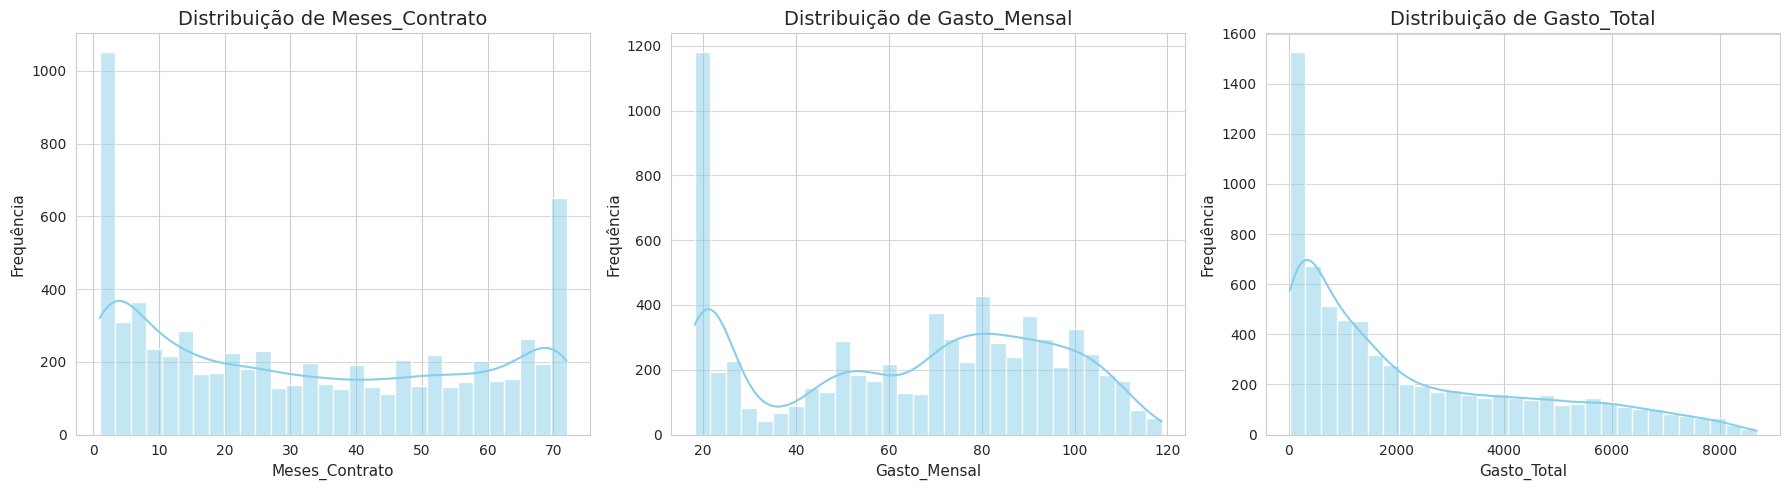

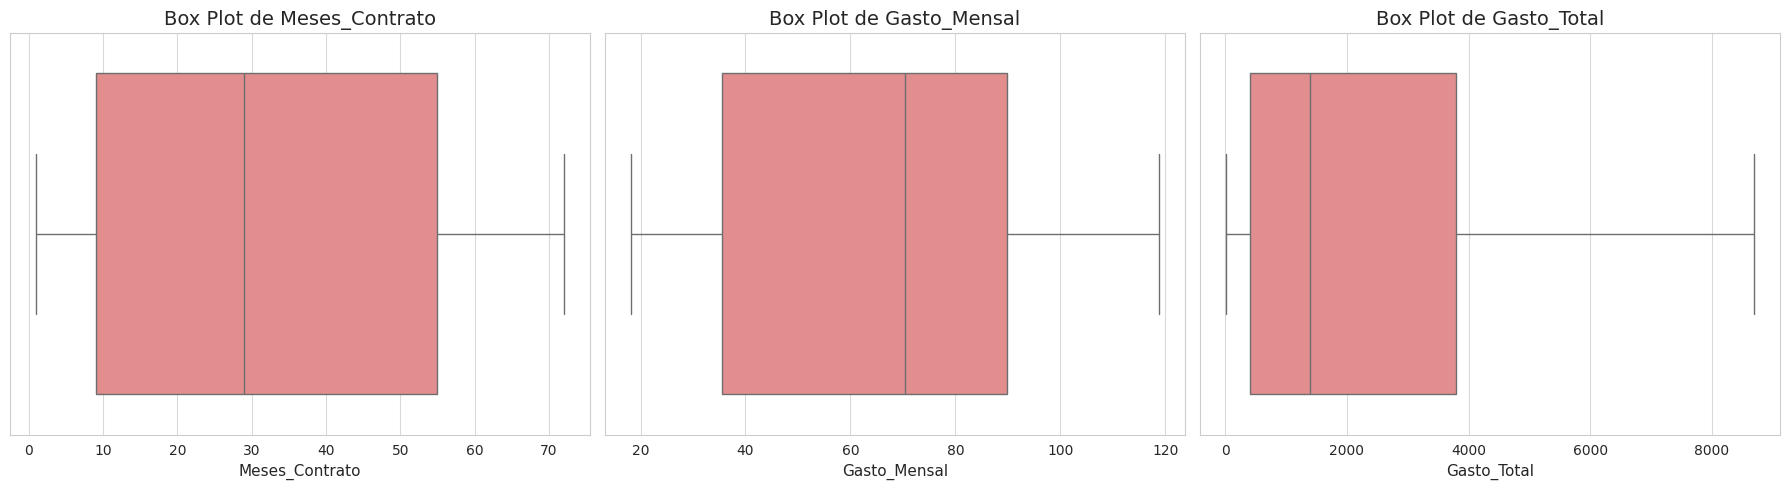


Interpretação dos gráficos de distribuição: Fornecem uma visão visual da forma, centro e dispersão dos dados, incluindo a presença de outliers e assimetria. Por exemplo, Gasto_Total e Meses_Contrato podem mostrar distribuições enviesadas.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # Garante o estilo visual

# --- Análise Visual da Distribuição de Variáveis Numéricas Contínuas ---
print("\n--- Visualizando a Distribuição de Variáveis Numéricas Chave ---")

# Colunas numéricas a serem analisadas
numeric_cols_for_dist = ['Meses_Contrato', 'Gasto_Mensal', 'Gasto_Total']

plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric_cols_for_dist):
    # Histograma
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_final[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frequência', fontsize=11)
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric_cols_for_dist):
    # Box Plot
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df_final[col], color='lightcoral')
    plt.title(f'Box Plot de {col}', fontsize=14)
    plt.xlabel(col, fontsize=11)
    plt.grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

print("\nInterpretação dos gráficos de distribuição: Fornecem uma visão visual da forma, centro e dispersão dos dados, incluindo a presença de outliers e assimetria. Por exemplo, Gasto_Total e Meses_Contrato podem mostrar distribuições enviesadas.")

# **(Gráfico) Análise Bivariada de Variáveis Numéricas vs. Churn (Box Plots por Categoria)**


--- Comparando Variáveis Numéricas entre Clientes com e sem Churn ---


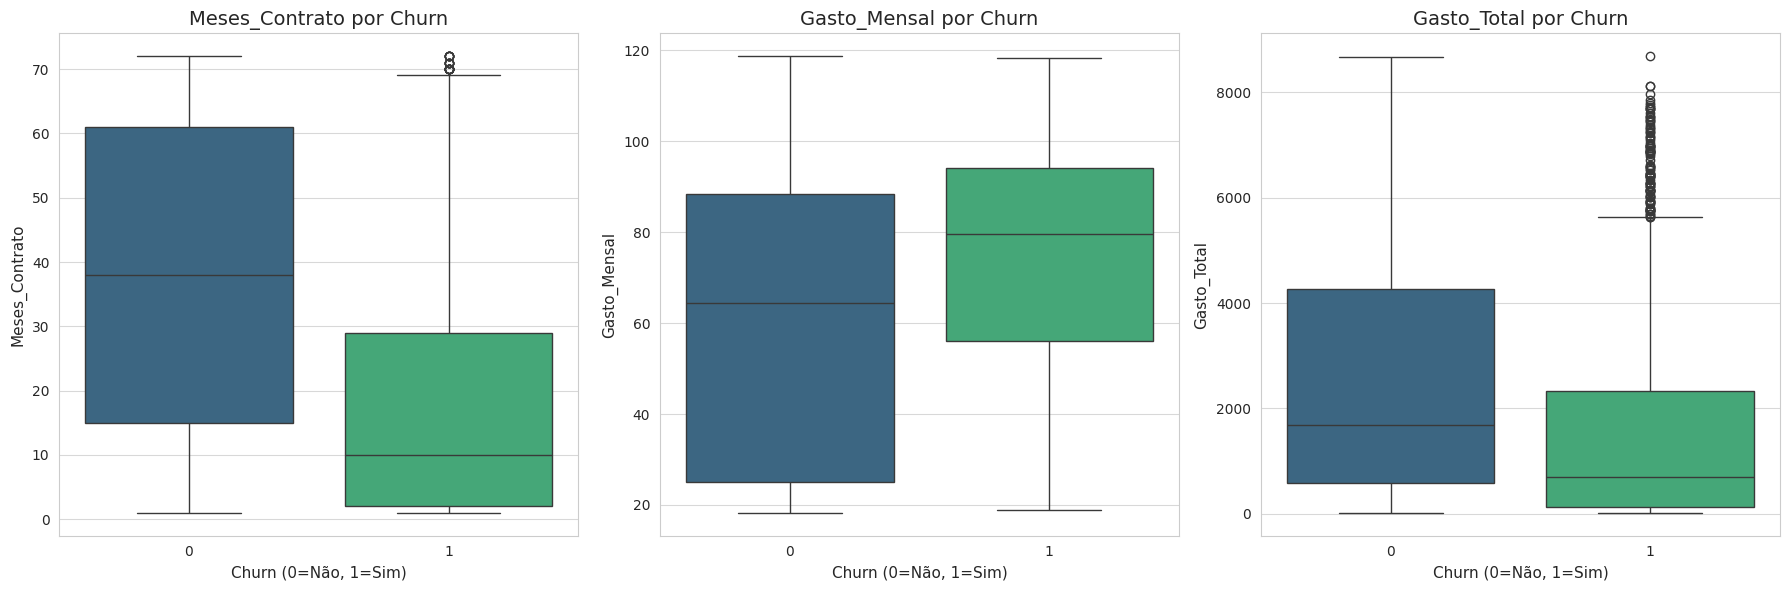


Interpretação dos box plots por Churn: Estes gráficos ajudam a visualizar diferenças nas medianas e na dispersão das variáveis numéricas entre os grupos de churn e não-churn. Por exemplo, espera-se que 'Meses_Contrato' seja menor para clientes com churn e 'Gasto_Mensal' e 'Gasto_Total' possam apresentar diferentes comportamentos.


In [ ]:
# --- Análise de Variáveis Numéricas por Churn (Box Plots) ---
print("\n--- Comparando Variáveis Numéricas entre Clientes com e sem Churn ---")

plt.figure(figsize=(18, 6))
for i, col in enumerate(numeric_cols_for_dist):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df_final, palette='viridis', hue='Churn', legend=False)
    plt.title(f'{col} por Churn', fontsize=14)
    plt.xlabel('Churn (0=Não, 1=Sim)', fontsize=11)
    plt.ylabel(col, fontsize=11)
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

print("\nInterpretação dos box plots por Churn: Estes gráficos ajudam a visualizar diferenças nas medianas e na dispersão das variáveis numéricas entre os grupos de churn e não-churn. Por exemplo, espera-se que 'Meses_Contrato' seja menor para clientes com churn e 'Gasto_Mensal' e 'Gasto_Total' possam apresentar diferentes comportamentos.")

# **(Gráfico) Análise de Outras Variáveis Categóricas (Tabelas de Contingência e Gráficos de Barras Empilhados/Agrupados)**


--- Analisando a Taxa de Churn para Outras Variáveis Categóricas ---


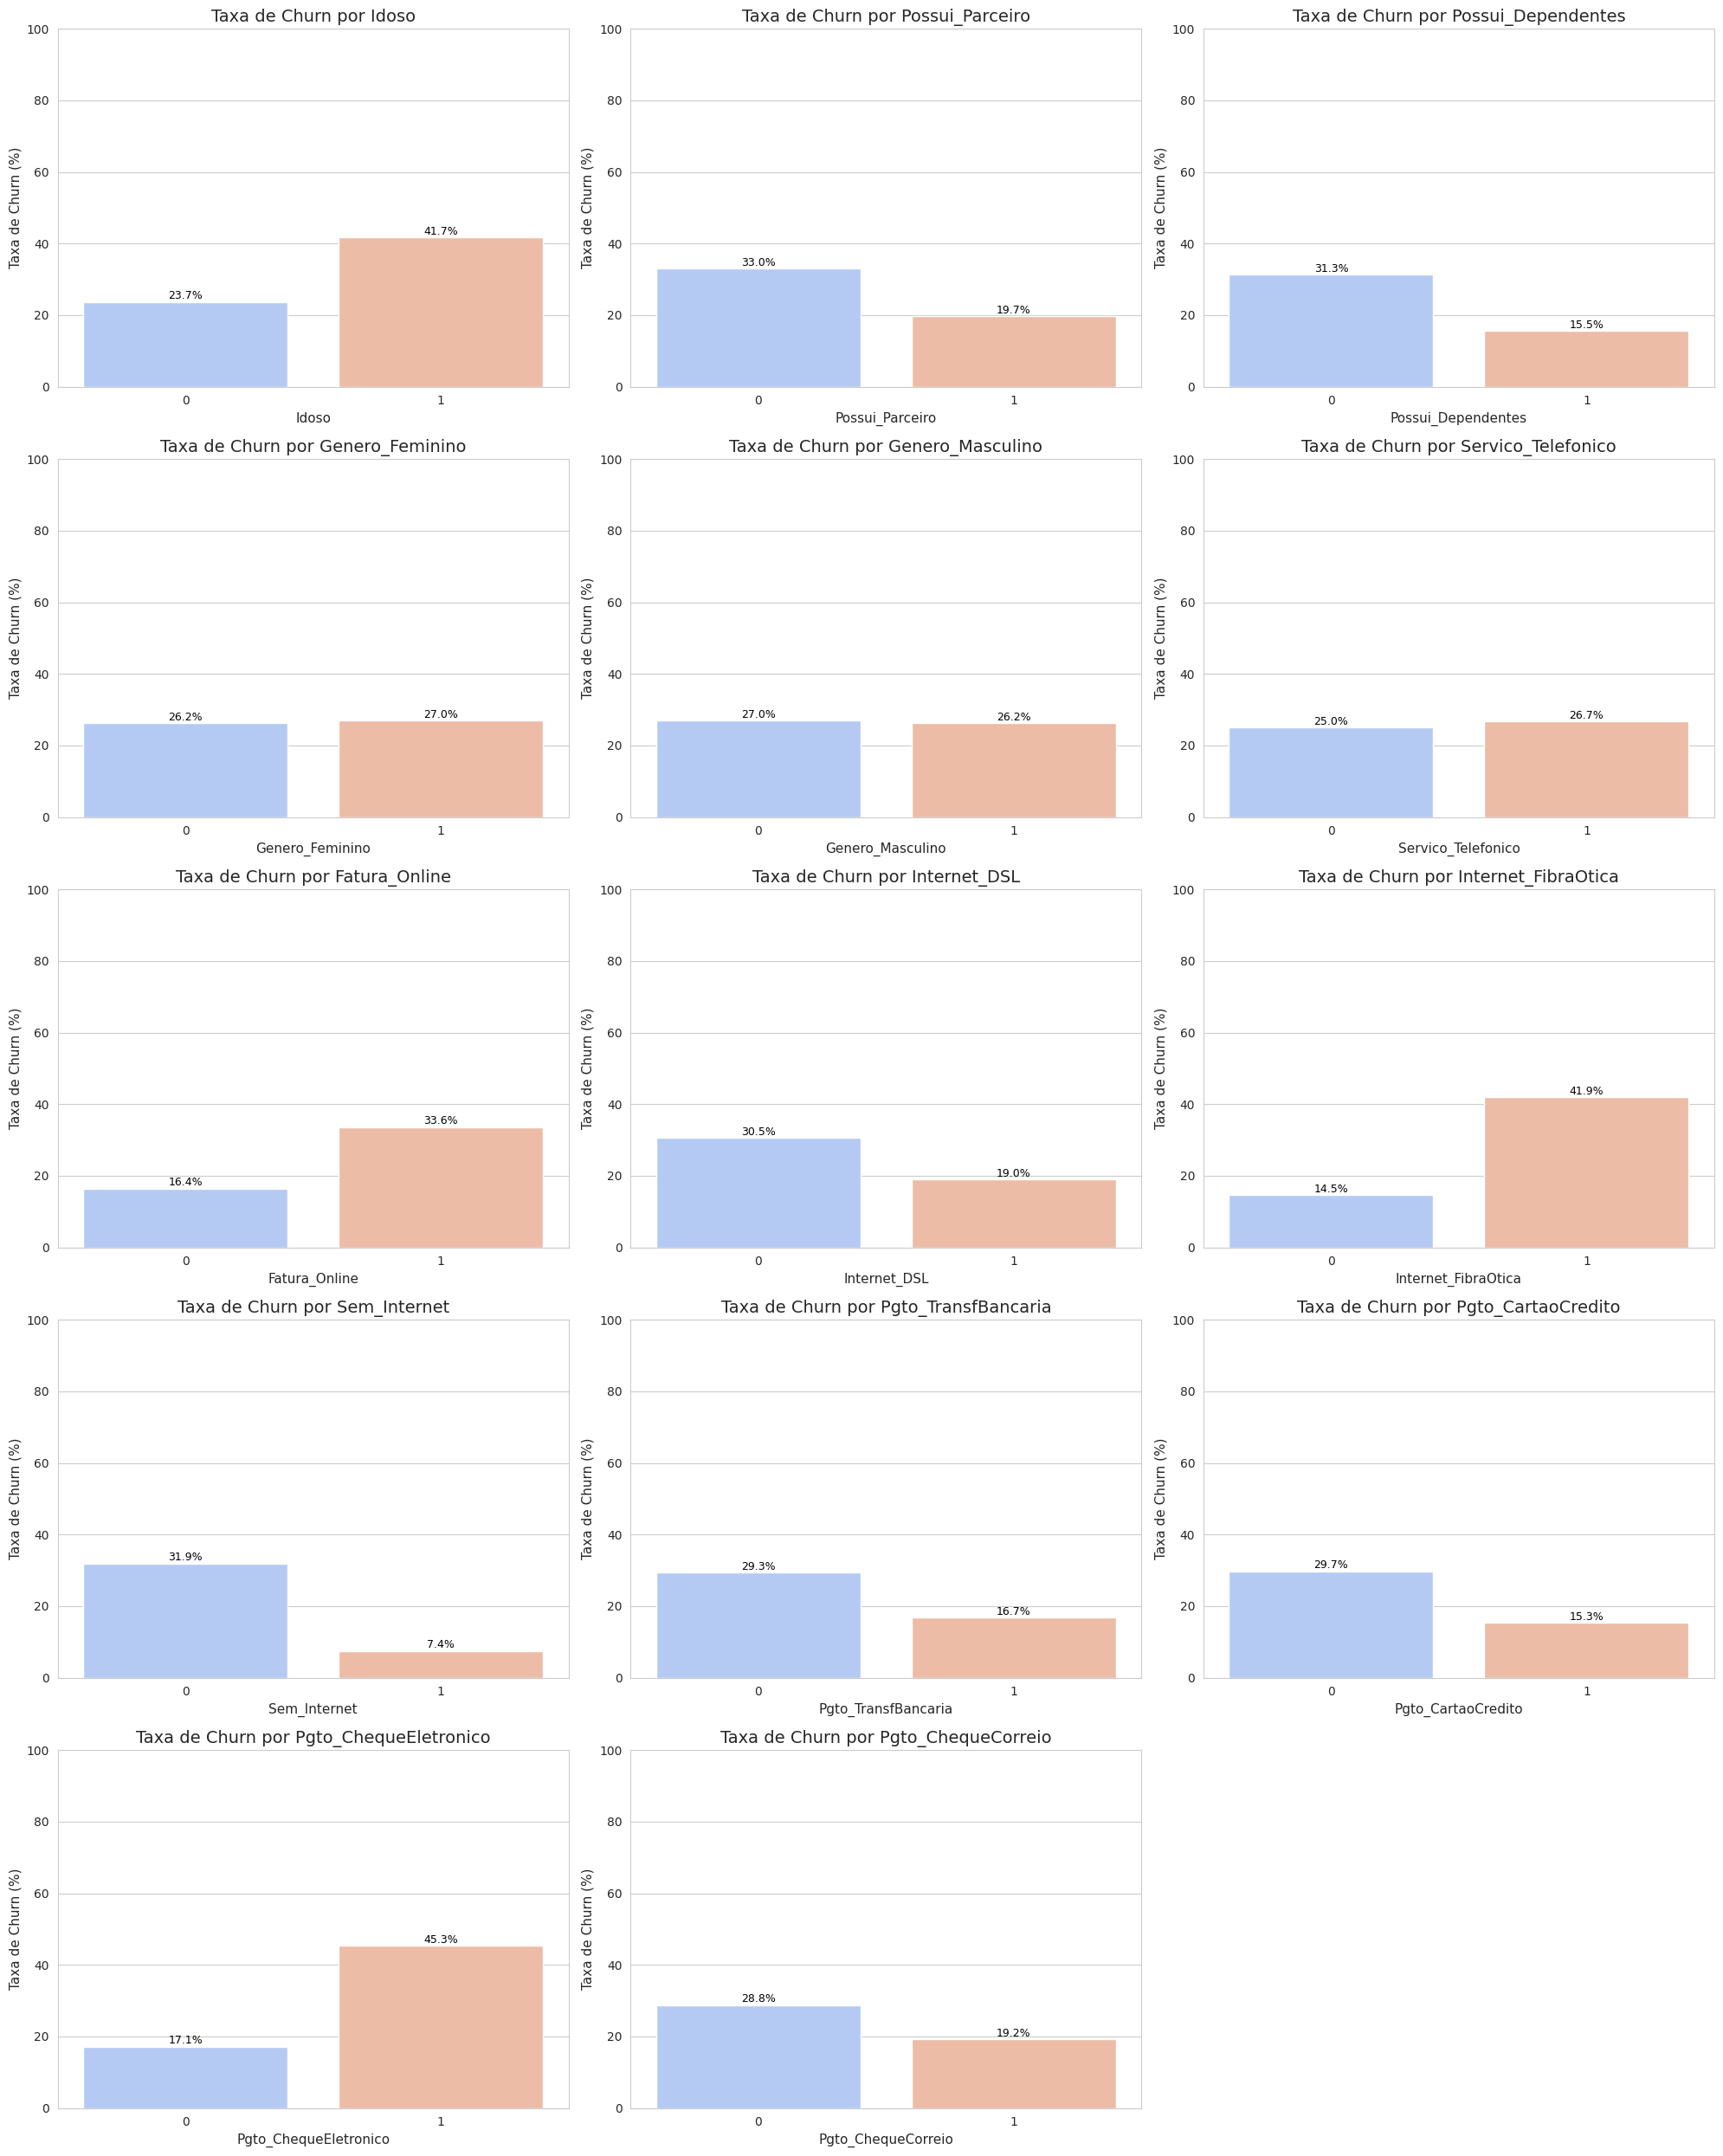


Interpretação dos gráficos de churn por categoria: Revelam quais categorias específicas dentro de cada variável têm maior ou menor propensão ao churn. Por exemplo, 'Idoso' ou 'Fatura_Online' podem ter taxas de churn distintas.


In [ ]:
# --- Análise de Variáveis Categóricas por Churn ---
print("\n--- Analisando a Taxa de Churn para Outras Variáveis Categóricas ---")

categorical_cols_for_churn = [
    'Idoso', 'Possui_Parceiro', 'Possui_Dependentes', 'Genero_Feminino', 'Genero_Masculino',
    'Servico_Telefonico', 'Fatura_Online',
    'Internet_DSL', 'Internet_FibraOtica', 'Sem_Internet',
    'Pgto_TransfBancaria', 'Pgto_CartaoCredito', 'Pgto_ChequeEletronico', 'Pgto_ChequeCorreio'
]

plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols_for_churn):
    if col in df_final.columns:
        churn_rate_by_cat = df_final.groupby(col)['Churn'].mean().mul(100).reset_index(name='Taxa_Churn_%')

        plt.subplot(5, 3, i + 1) # Ajuste o grid de subplots conforme necessário
        ax = sns.barplot(x=col, y='Taxa_Churn_%', data=churn_rate_by_cat, palette='coolwarm', hue=col, legend=False)
        plt.title(f'Taxa de Churn por {col}', fontsize=14)
        plt.xlabel(col, fontsize=11)
        plt.ylabel('Taxa de Churn (%)', fontsize=11)
        plt.ylim(0, 100) # Garante que o Y vá até 100%

        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')
    else:
        print(f"  AVISO: Coluna '{col}' não encontrada para análise.")

plt.tight_layout()
plt.show()

print("\nInterpretação dos gráficos de churn por categoria: Revelam quais categorias específicas dentro de cada variável têm maior ou menor propensão ao churn. Por exemplo, 'Idoso' ou 'Fatura_Online' podem ter taxas de churn distintas.")